In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

### Data visualization

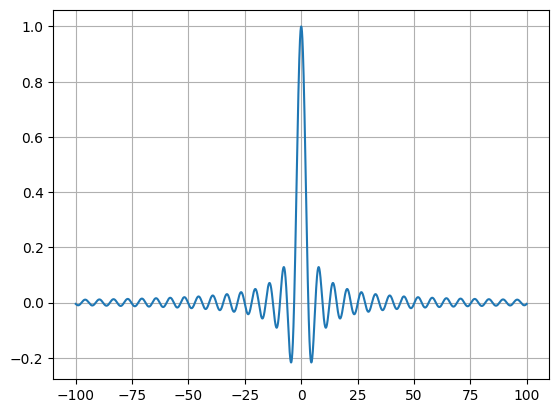

In [2]:
x_data = np.linspace(-100, 100, 30000)
y_data = np.sin(x_data) / x_data
plt.plot(x_data, y_data)
plt.grid()
plt.show()

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dataset = TensorDataset(torch.tensor(x_data).float(), torch.tensor(y_data).float())

trainsize, testsize = int(0.9*len(dataset)), len(dataset)-int(0.9*len(dataset))
trainset, testset = torch.utils.data.random_split(dataset, [trainsize, testsize], generator=torch.Generator().manual_seed(42))

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

In [4]:
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

model = Perceptron(1, 1000, 1).to(device)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

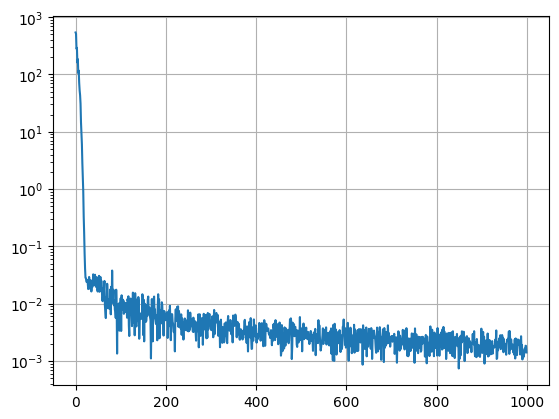

In [6]:
num_epochs = 1000
all_losses = []
model.train()

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.reshape(-1, 1).to(device), y.reshape(-1, 1).to(device)
        preds = model(x)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
    all_losses.append(loss.item())
    # print(f'Epoch: [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}')

plt.plot(all_losses)
plt.yscale('log')
plt.grid()
plt.show()

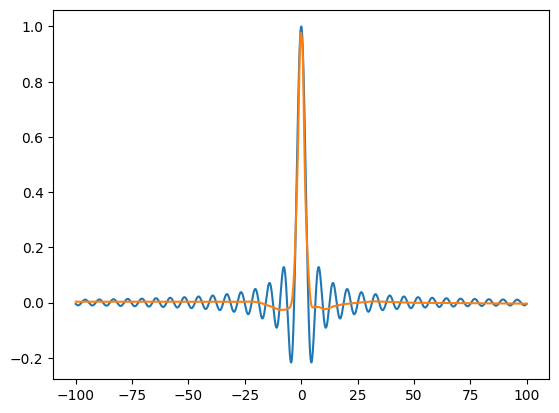

In [7]:
plt.plot(x_data, y_data)
plt.plot(x_data, model(torch.tensor(x_data).reshape(-1, 1).float().to(device)).cpu().detach().numpy())
plt.show()